In [1]:
import pandas as pd
import kaggle
import zipfile
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import random


C:\Users\Zooby\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_names = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1')
print(file_names)

['100_0_0_20170112213500903.jpg', '100_0_0_20170112215240346.jpg', '100_1_0_20170110183726390.jpg', '100_1_0_20170112213001988.jpg', '100_1_0_20170112213303693.jpg', '100_1_0_20170112215032192.jpg', '100_1_0_20170117195420803.jpg', '100_1_0_20170119212053665.jpg', '100_1_2_20170105174847679.jpg', '100_1_2_20170110182836729.jpg', '100_1_2_20170112213615815.jpg', '100_1_2_20170112222336458.jpg', '101_0_0_20170112213500903.jpg', '101_1_2_20170105174739309.jpg', '103_0_2_20170112213001988.jpg', '105_0_0_20170112213001988.jpg', '105_1_0_20170112213001988.jpg', '105_1_0_20170112213021902.jpg', '105_1_0_20170112213507183.jpg', '105_1_1_20170112213303693.jpg', '10_0_0_20161220222308131.jpg', '10_0_0_20170103200329407.jpg', '10_0_0_20170103200522151.jpg', '10_0_0_20170103233459275.jpg', '10_0_0_20170104013211746.jpg', '10_0_0_20170110215927291.jpg', '10_0_0_20170110220033115.jpg', '10_0_0_20170110220111082.jpg', '10_0_0_20170110220235233.jpg', '10_0_0_20170110220251986.jpg', '10_0_0_20170110220

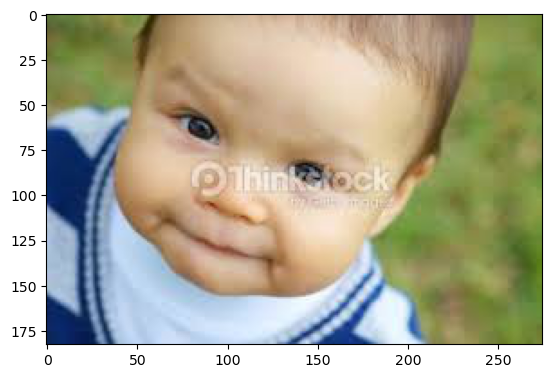

In [3]:
#display image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1\\1_0_0_20161219140623097.jpg')
imgplt = plt.imshow(img)
plt.show()

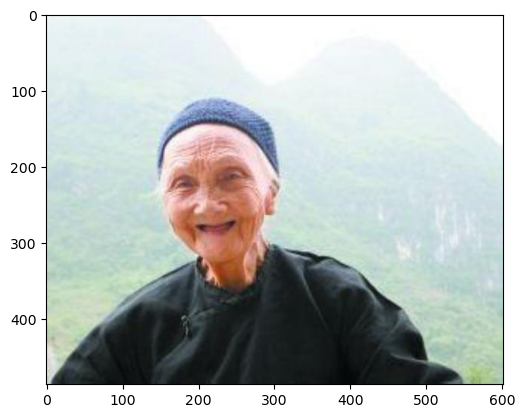

In [4]:
#display image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1\\101_1_2_20170105174739309.jpg')
imgplt = plt.imshow(img)
plt.show()

In [5]:
len(file_names)

24108

###### Resizing images

In [6]:
original_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1\\'
resized_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_128\\'

for filename in os.listdir(original_folder):
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

In [6]:
directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_128\\'
age = [ ]
gender = [ ]
ethnicity = [ ]
date_time = [ ]
img_path = [ ] 

for file in os.listdir(directory):
    if file.endswith('.jpg') or file.endswith('.png'):
        components = file.split('_')
        age.append(int(components[0]))
        
        # Handle gender and ethnicity components without converting to int
        if len(components) > 2:  # Check if there are enough components
            gender.append(components[1])
            ethnicity.append(components[2])
        else:
            gender.append('Unknown')
            ethnicity.append('Unknown')
        
        # Append the datetime string without the file extension
        if len(components) > 3:  # Check if there are enough components
            date_time.append(components[3].split('.')[0])
        else:
            date_time.append('Unknown')
        
        img_path.append(file)

In [7]:
len(age)

24108

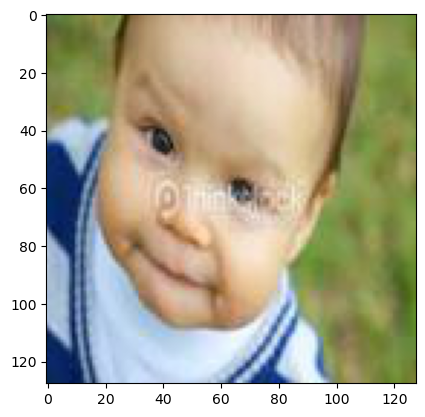

In [8]:
#display resized image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_128\\1_0_0_20161219140623097.jpg')
imgplt = plt.imshow(img)
plt.show()

###### Reshaping as array

In [9]:
import cv2
import glob
directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_128\\'

image_extension = ['png', 'jpg']
files = []

[files.extend(glob.glob(directory + '*.' + e)) for e in image_extension]

images = np.asarray([cv2.imread(file) for file in files])

In [10]:
images.shape

(24108, 128, 128, 3)

# Predict Gender

In [11]:
X = images
Y = np.asarray(gender, dtype=str)
print(X.dtype, Y.dtype)

uint8 <U1


In [12]:
print(X.dtype, Y.dtype)

uint8 <U1


In [13]:
values, counts = np.unique(Y, return_counts = True)
print(values)
print(counts)

['0' '1' '3']
[4539 5597    1]


In [14]:
# Find the indices where gender is not '3'
valid_indices = np.where(Y != '3')[0]

# Use the valid indices to filter both images and gender arrays
X = X[valid_indices]
Y = Y[valid_indices]

In [15]:
print("Unique values of Y before LabelEncoder:", np.unique(Y))

Unique values of Y before LabelEncoder: ['0' '1']


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [17]:
print("Unique values of Y before LabelEncoder:", np.unique(Y))

Unique values of Y before LabelEncoder: [0 1]


In [18]:
values, counts = np.unique(Y, return_counts = True)
print(values)
print(counts)

[0 1]
[4539 5597]


###### Train test split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, stratify = Y)
print(X.shape, X_train.shape, X_test.shape)

(10136, 224, 224, 3) (8108, 224, 224, 3) (2028, 224, 224, 3)


###### Scaling pixels

In [20]:
X_trained_scaled = X_train/255
X_test_scaled = X_test/255

###### Building neural net

In [21]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pretrained model using TensorFlow Hub
pretrained_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"
pretrained_model = hub.KerasLayer(pretrained_model_url, trainable=False)

num_of_classes = 2

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # Assuming input shape is (224, 224, 3)
    tf.keras.layers.Lambda(lambda x: pretrained_model(x)),  # Wrap the pretrained model using Lambda layer
    tf.keras.layers.Dense(num_of_classes)  # Output layer
])

# Print model summary
model.summary()


C:\Users\Zooby\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,004 (7.83 KB)

 Trainable params: 2,004 (7.83 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#Compiling model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [23]:
model.fit(X_trained_scaled, Y_train, epochs=5)

Epoch 1/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 97s 361ms/step - acc: 0.7486 - loss: 0.6016
Epoch 2/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 95s 374ms/step - acc: 0.8377 - loss: 0.3643
Epoch 3/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 96s 378ms/step - acc: 0.8431 - loss: 0.3493
Epoch 4/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 100s 393ms/step - acc: 0.8383 - loss: 0.3511
Epoch 5/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 91s 359ms/step - acc: 0.8547 - loss: 0.3413


In [24]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 346ms/step - acc: 0.8506 - loss: 0.3464
Test Loss = 0.3742774724960327
Test Accuracy = 0.8436883687973022


###### Predictive system

Path of the image to be predicted: C:\\Users\\Zooby\\Desktop\\gender_test_images\\caitlyn_jenner.jpg


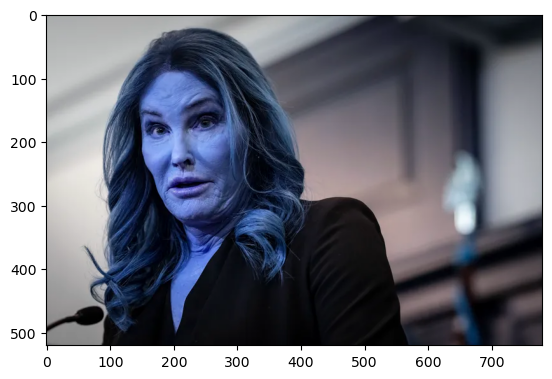

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
[[-2.3106217  1.1164385]]
1
The image represents a Female


In [35]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Male')

else:
  print('The image represents a Female')